In [66]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error


In [67]:
df=pd.read_csv("HDFCFINAL.csv")

In [68]:
#personalised normalization by junaid 
x= df['Close'].max()
y= df['Close'].min()
z=df['Open'].max()
df['NOpen']=1.0
df['NClose']=1.0
df['NPreClose']=1.0
df['NPPreClose']=1.0
#print(x/y)
#(df['Close'])[1]=2
print((df['Close'])[1])
df.dropna()
for i in range(len(df['Close'])):
  (df['NClose'])[i]=float((df['Close'])[i])/x
  (df['NPreClose'])[i]=float((df['PreClose'])[i])/x
  (df['NOpen'])[i]=float((df['Open'])[i])/z
  #(df['NPPreClose'])[i]=float((df['PPreClose'])[i])/x


#df.dtypes
df.min()

13.402999999999999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Unnamed: 0                                                      0
Date                                                   01-02-2010
Open                                                       11.201
High                                                       11.209
Low                                                        10.985
Close                                                      11.083
Adj Close                                                  10.361
Volume                                                     288400
headlines       ...Capital inflows likely to be strong, may pu...
label                                                           0
Subjectivity                                                    0
Polarity                                                     -0.8
Compound                                                  -0.9981
Negative                                                        0
Neutral                                                     0.642
Positive  

In [69]:
#FOR PERSOANLISED SCALLER 
#X=df[['Compound','Negative','Neutral','Positive','label','NPPreClose','Subjectivity','Polarity','scores_sum']]
X=df[['NPreClose','Negative','Neutral','Positive','Compound']]
Y=df[['NClose']] 
Z=df[['NOpen']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,shuffle=False)


In [70]:
#change hidden layer,learning rate,activation function,validation fraction...etc
#i have used relu insted of logistics ,basic hidden layers =2 , 
MLPC=MLPRegressor(activation='relu',hidden_layer_sizes=(200),solver='lbfgs',learning_rate='adaptive',max_iter=300000)
#MLPC=MLPRegressor(hidden_layer_sizes=(3,2), activation='logistic',solver='lbfgs', alpha=0.00001, learning_rate_init = 0.001, shuffle=False)
# MLP=MLPClassifier(hidden_layer_sizes=(3,2),)
#MLP=MLPRegressor(hidden_layer_sizes=(5,2),learning_rate='adaptive')
#MLPC=MLPClassifier(hidden_layer_sizes=(100, 200), activation='relu',solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)

In [71]:
MLPC.fit(X_train,Y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=300000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [72]:
X_test.head()

,NPreClose,Negative,Neutral,Positive,Compound
2248,0.763080,0.080,0.874,0.046,-0.8364
2249,0.776712,0.046,0.913,0.040,-0.2960
2250,0.778768,0.121,0.812,0.067,-0.9648
2251,0.785470,0.091,0.829,0.080,-0.7997
2252,0.788896,0.000,0.937,0.063,0.8591


In [73]:
import numpy as np
from collections import defaultdict
#this one is written for the normal normalization written by me 

#npreclose can be replaced by nopen for intraday prediction
pred=[]
t=[]

o=0

#print(x)
check =0
ind=0
p=[]
for i, row in X_test.iterrows():

  t=row
  if check==0:

    p.append(row['NPreClose'])
    print("zero")
  
  p.append(row['Negative'])
  p.append(row['Neutral'])
  p.append(row['Positive'])
  #p.append(row['label'])
  p.append(row['Compound'])
  #p.append(row['Subjectivity'])
  #p.append(row['Polarity'])
  #p.append(row['scores_sum'])
  #p.append(row['NPreClose'])   # this is updated in if loop everytime we try next iteration 
  # i should check if last predicted is going as an input to the next train 

  
  check=i
  ind=ind+1 
 # print(p)  

  q=np.reshape(p,(1,5))
 # print(q)
  onepre=MLPC.predict(q)
  pred.append(MLPC.predict(q))
  p=[]
  p.append(row['NPreClose'])  #for intraday trading we will check the trend of market each day

  #p.append(onepre[0])
  #if i<len(X_test)-1:

    #X_test[i+1,4]=pred[i]       # this is to be updated everytime with the no. of parameters passed to check if we are updating the real paramter exactlly
    
    #print (pred[i],Y_test[i],X_test[i+1,5])



#loop though x train and predict y train and then update next xtrain and preddict next y train and get the output 

#pred=MLP.predict(x)
#print(pred, Y_test[0])



zero


In [74]:
X_test.head()

,NPreClose,Negative,Neutral,Positive,Compound
2248,0.763080,0.080,0.874,0.046,-0.8364
2249,0.776712,0.046,0.913,0.040,-0.2960
2250,0.778768,0.121,0.812,0.067,-0.9648
2251,0.785470,0.091,0.829,0.080,-0.7997
2252,0.788896,0.000,0.937,0.063,0.8591


In [75]:
#here i need to predict recod by record 

#the below prediction is based on the real previious close values 
#we have stored predications in pred variable and use it for getting the real accuracy 
#Y_predicted=MLPC.predict(X_test)
biaspred=[]
for i in range(0,len(pred)):
  biaspred.append(pred[i]+0.0)
Y_predicted=biaspred
#here we have added necessary bias to increase the model's accuracy 

#print(Y_predicted[0],Y_test[0])
from math import sqrt
print("R2 SCORE ")
print(r2_score(Y_test,Y_predicted))
print("mean absolute error ")

print(mean_absolute_error(Y_test,Y_predicted))
print("mean squared error")
print(mean_squared_error(Y_test,Y_predicted))
print("root mean squared error")
print(sqrt(mean_squared_error(Y_test,Y_predicted)))
#print("mean squared log error ")
#print(mean_squared_log_error(Y_test,Y_predicted))
print("median absolute error ")
print(median_absolute_error(Y_test,Y_predicted))


#on increasing the hidden to 5,2 we reduced mean square error by 2% when we employed subjectivity and polarity but R2 score decreased 

R2 SCORE 
0.9199140419791835
mean absolute error 
0.01565552431629503
mean squared error
0.00042589577844020387
root mean squared error
0.02063724251057306
median absolute error 
0.012821408669033363


In [76]:
#test accuracy 
import numpy as np
bp=[]
for i in range(0,len(pred)):
  bp.append(pred[i]+0.0)
a = np.array(Y_test)   # actual labels
b = np.array(bp)   # predicted labels
trend=[]
ptrend=[]
trendn=[]
ptrendn=[]
#accuracy =0
#TREND ACcuracy
#checking trend of the original data 
trend.append(0)
for i in range (1,len(a)):
  
  if (a[i]-a[i-1])>0:
    trend.append(1)
  if (a[i]-a[i-1])<0:
    trend.append(-1)
  if(a[i]==a[i-1]):
    trend.append(0) 



#print(trend) 
#check the trend of the predicted data 
ptrend.append(0)
for i in range (1,len(b)):
  
  if (b[i]-b[i-1])>0:
    ptrend.append(1)
  if (b[i]-b[i-1])<0:
    ptrend.append(-1)
  if(b[i]==b[i-1]):
    ptrend.append(0)
#print(ptrend) 







v=[]
w=[]
#calculation of trend accuracy :
tp=0
tn=0
tnu=0
fnu=0
fp=0
fn=0
#for i in range(0,int(len(trend))):
for i in range(0,100):
  if (trend[i]==ptrend[i]):
    if trend[i]==1:
      tp=tp+1
    if trend[i]==0:
      tp=tp+1
    if trend[i]==-1:
      tn=tn+1
    
  if (trend[i]==1 and ptrend[i]==-1):
    fn=fn+1
  if (trend[i]==-1 and ptrend[i]==1):
    fp=fp+1
#down from here i will handle some extra 4 cases which were left last time 
  if (trend[i]==0 and ptrend[i]==-1):
    fn=fn+1
  if (trend[i]==0 and ptrend[i]==1):
    tp=tp+1
  if (trend[i]==1 and ptrend[i]==0):
    tp=tp+1
  if (trend[i]==-1 and ptrend[i]==0):
    fp=fp+1
      
  
#extra two cases added in case the prdicted model show no change while the model shows positive or negative trend 
  
print("TP:TN:FP:FN:TNU:FNU")
print (tp,tn,fp,fn,tnu,fnu)  
print("precion ")
precision =(tp+tnu)/(fp+tp+tnu)
print(precision)
recall = (tp+tnu)/(fn+tp+tnu)
print("recall")
print(recall)

print("accuracy ")
print((tp+tn+tnu)/(tp+tn+fp+fn+tnu+fnu)) 
#F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)
fscore= (2*precision*recall)/(precision + recall)
print("F1 SCORE")
print(fscore)
for i in range(0, int(len(a))):


 
 #b[i]=b[i]
  v.append(a[i]*x)
  w.append(b[i]*x)

 

  
from sklearn.metrics import mean_absolute_error as mae
print("MAE")
print(mae(v,w))
print(mae(a,b))


def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
print("MAPE")
print(mape(v,w))
print(mape(a,b))


def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean()
print('MSE')
print(mse(v,w))
print(mse(a,b))
print("RMSE")
print(sqrt(mse(a,b)*x))




TP:TN:FP:FN:TNU:FNU
30 23 23 24 0 0
precion 
0.5660377358490566
recall
0.5555555555555556
accuracy 
0.53
F1 SCORE
0.5607476635514018
MAE
1.0278634333308259
0.01565552431629503
MAPE
1.7789356120207027
1.7789356120207025
MSE
1.8358573534560165
0.00042589577844020387
RMSE
0.1672189789096794


In [77]:
# here we have to check trend with span of n days, FUTURE TREND 
#this code block is n day test accuracy 

n_days=5
for i in range(0,n_days):
  trendn.append(0)

for i in range (n_days,(len(a))):
  
  if (a[i]-a[i-n_days])>0:
    trendn.append(1)
  if (a[i]-a[i-n_days])<0:
    trendn.append(-1)
  if (a[i]==a[i-n_days]):
    trendn.append(0)
#above is real n day trend and now we will add the predicted n day trend 
for i in range(0,n_days):
  ptrendn.append(0)

for i in range (n_days,(len(b))):
  
  if (b[i]-b[i-n_days])>0:
    ptrendn.append(1)
  if (b[i]-b[i-n_days])<0:
    ptrendn.append(-1)
  if (b[i]==b[i-n_days]):
    ptrendn.append(0)



v=[]
w=[]
#calculation of trend accuracy :
tp=0
tn=0
tnu=0
fnu=0
fp=0
fn=0
#for i in range(0,int(len(trend))):
for i in range(0,100):
  if (trendn[i]==ptrendn[i]):
    if trendn[i]==1:
      tp=tp+1
    if trendn[i]==0:
      tp=tp+1
    if trendn[i]==-1:
      tn=tn+1
    
  if (trendn[i]==1 and ptrendn[i]==-1):
    fn=fn+1
  if (trendn[i]==-1 and ptrendn[i]==1):
    fp=fp+1
#down from here i will handle some extra 4 cases which were left last time 
  if (trendn[i]==0 and ptrendn[i]==-1):
    fn=fn+1
  if (trendn[i]==0 and ptrendn[i]==1):
    tp=tp+1
  if (trendn[i]==1 and ptrendn[i]==0):
    tp=tp+1
  if (trendn[i]==-1 and ptrendn[i]==0):
    fp=fp+1
  
#extra two cases added in case the prdicted model show no change while the model shows positive or negative trend 
  
print("TP:TN:FP:FN:TNU:FNU")
print (tp,tn,fp,fn,tnu,fnu)  
print("precion ")
precision =(tp)/(fp+tp)
print(precision)
recall = (tp)/(fn+tp)
print("recall")
print(recall)

print("accuracy ")
print((tp+tn)/(tp+tn+fp+fn)) 
#F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)
fscore= (2*precision*recall)/(precision + recall)
print("F1 SCORE")
print(fscore)
for i in range(0, int(len(a))):


 
 #b[i]=b[i]
  v.append(a[i]*x)
  w.append(b[i]*x)

 

  
from sklearn.metrics import mean_absolute_error as mae
print("MAE")
print(mae(v,w))
print(mae(a,b))


def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
print("MAPE")
print(mape(v,w))
print(mape(a,b))


def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean()
print('MSE')
print(mse(v,w))
print(mse(a,b))
print("RMSE")
print(sqrt(mse(a,b)*x))




TP:TN:FP:FN:TNU:FNU
48 23 14 15 0 0
precion 
0.7741935483870968
recall
0.7619047619047619
accuracy 
0.71
F1 SCORE
0.768
MAE
1.0278634333308259
0.01565552431629503
MAPE
1.7789356120207027
1.7789356120207025
MSE
1.8358573534560165
0.00042589577844020387
RMSE
0.1672189789096794


In [78]:
#for i in range (0,15):
 # print(trend[i],ptrend[i])
  #print("next day")
#store more than one models and plot together 
sdl=b


In [79]:
#pdl=b

In [80]:
#sdnl=b

In [81]:
#pdnl=b

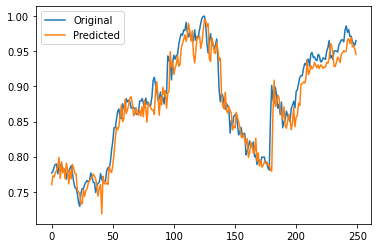

In [82]:
#here we will start  plotting 
import matplotlib.pyplot as plt
day=[]
for i in range(len(a)):
  day.append(i) 

  
# plot lines
plt.plot(day, a, label = "Original")
plt.plot(day, sdl, label = "Predicted")
#plt.plot(a, sdl, label = "PREDICTED[SDNL]")
#plt.plot(day, pdl, label = "PREDICTED[PDL]")
#plt.plot(day, pdnl, label = "PREDICTED[PDNL]")

plt.legend()
#plt.figure(figsize=(200,200))

#image = plt.figure(figsize=(50,50), dpi= 500)

plt.savefig("Relaince.png",dpi=500)
plt.show()


In [83]:
from google.colab import files 

files.download('Relaince.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>